In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sb
sb.init_printing()
print("Version de sympy :",sb.__version__) 
from IPython.display import display

Version de sympy : 1.6.2


# <span style="color:#A000A0">Réponse à une source oblique dans un fluide</span>

In [20]:
r,c,rho = sb.symbols("r,c,rho", real=True, positive=True)
x,y,z,t,a,b = sb.symbols("x,y,z,t,theta,phi", real=True)
x,y,z = sb.symbols("x,y,z")
M = (x,y,z)

## <span style="color:#0000A0">Équations aux dérivées partielles</span>

### <span style="color:#006000">Dans le domaine physique</span>

In [34]:
V = [ sb.Function(n) for n in ("v_x","v_y","v_z") ]
p = sb.Function("p")
sp,F = sb.Function("s_p"),[ sb.Function(n) for n in ("f_x","f_y","f_z") ]

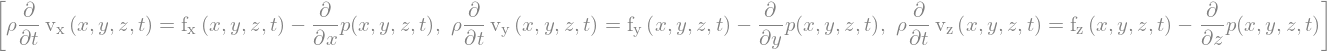

In [35]:
RFD = [ sb.Eq( rho*v(x,y,z,t).diff(t), -p(x,y,z,t).diff(c)+f(x,y,z,t) ) for (v,c,f) in zip(V,M,F) ] ; RFD

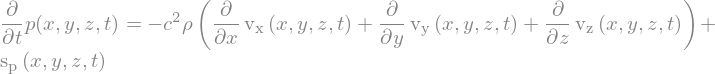

In [36]:
conservation = sb.Eq( p(x,y,z,t).diff(t), -rho*c**2*sum([v(x,y,z,t).diff(c)for (v,c) in zip(V,M) ]) + sp(x,y,z,t) )
conservation

### <span style="color:#006000">Dans le domaine transformé $(\mathbf{k},t)$</span>

In [29]:
K = sb.symbols("k_x,k_y,k_z")

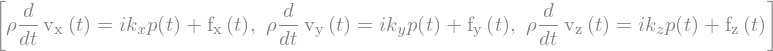

In [37]:
RFD_Kt = [ sb.Eq( rho*v(t).diff(t), sb.I*p(t)*k + f(t) ) for (v,k,f) in zip(V,K,F) ] ; RFD_Kt

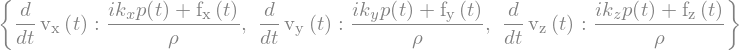

In [39]:
regle_a = sb.solve(RFD_Kt, [v(t).diff(t) for v in V]) ; regle_a

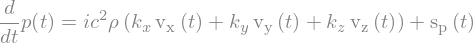

In [38]:
cons_Kt = sb.Eq( p(t).diff(t), sb.I*rho*c**2*sum([v(t)*k for (v,k) in zip(V,K) ]) + sp(t) )
cons_Kt

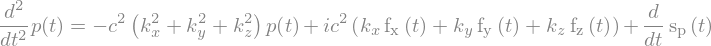

In [46]:
Onde_Kt = sb.Eq( cons_Kt.lhs.diff(t), \
                cons_Kt.rhs.diff(t).xreplace(regle_a).expand().collect( \
                                                    [-c**2*p(t), sb.I*c**2] ) )
Onde_Kt

## <span style="color:#0000A0">Tenseur de Green</span>

In [54]:
A,B = sb.symbols("A,B")
sol_p_Kt = A*sb.exp( sb.I*c*sb.sqrt(sum([k**2 for k in K]))*t)*sb.Heaviside(t) + \
           B*sb.exp(-sb.I*c*sb.sqrt(sum([k**2 for k in K]))*t)*sb.Heaviside(t)
sol_p_Kt

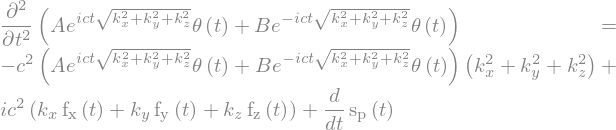

In [56]:
Onde_Kt.replace(p, lambda t:sol_p_Kt).simplify()

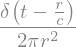

In [9]:
delta = sb.Function("delta")
G_sph = delta(t - r/c)/(2*sb.pi*r**2) ; G_sph

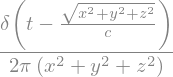

In [10]:
x,y,z = sb.symbols("x,y,z")
G_cart = G.replace(r,sb.sqrt(x**2+y**2+z**2)) ; G_cart

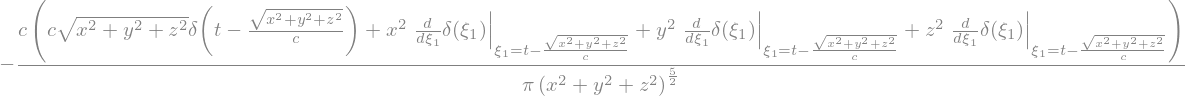

In [17]:
( G_cart.diff(t,2) - c**2*(G_cart.diff(x,2)+G_cart.diff(y,2)+G_cart.diff(z,2)) ).doit().factor()